## Testing different LLMs to test their performance on extracting information out of Presentation Slides



### Before getting started: extract each slide out of an example presentation
Example Data: [I3D:bio's Training Material for Omero](https://doi.org/10.5281/zenodo.8323588) (Schmidt, C., Bortolomeazzi, M. et al., 2023). For the following code to run, download the pdf in your current folder and name it ['WhatIsOMERO.pdf'](https://zenodo.org/records/8323588/files/202310_GENERAL_OMERO_Material_01_WhatIsOMERO.pdf?download=1) .

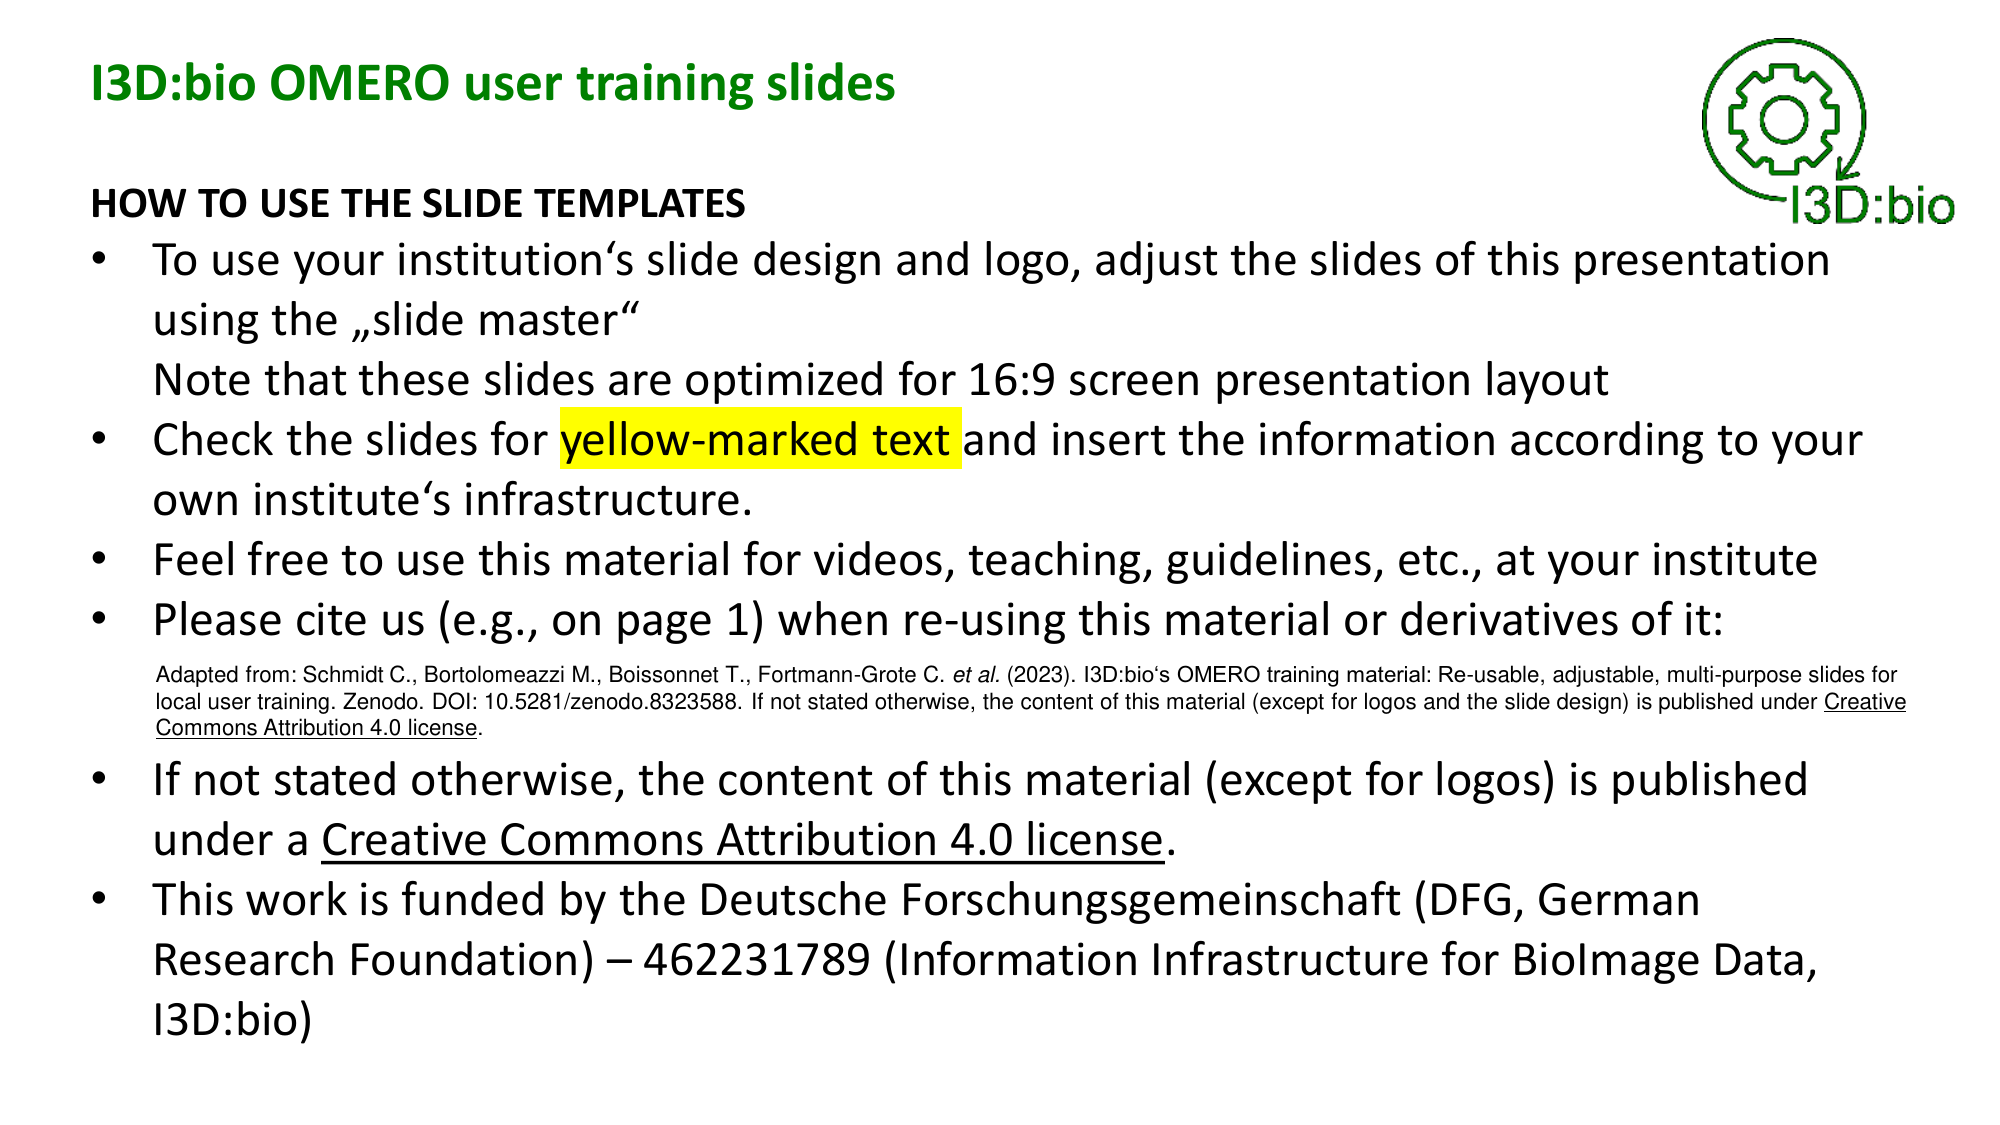

In [1]:
from pdf2image import convert_from_path
from IPython.display import display
from PIL import Image
from pdf_utilities import load_pdf, save_images, text_extraction
from endpoints import prompt_chatgpt, prompt_llama_11b, prompt_llama_90b, prompt_phi, prompt_gpt_mini

pdf = "WhatIsOMERO.pdf"
slides = load_pdf(pdf)
display(slides[0])

### Option to save those Images on disc:
- If you want to save the Images in their original size, just ignore the *new_width*  parameter, e.g. 

        save_images(".", slides)
       
- If you want them to be saved in another folder, just add this folder path instead of ".", e.g.

        Windows: save_images(r"C:\Users\username\Documents\Slides", slides)

        macOS: save_images("/Users/username/Documents/Slides", slides)

        Linux: save_images("/home/username/Documents/Slides", slides)

In [2]:
save_images(".", pdf, new_width=400)

## Text extraction
It is also possible to **extract the original text** from the PDF slides. This might be useful for comparison or further processing later on. This code will extract the text and saves it as image-text pairs in a dictionary on the disc:

You have to install pdfplumber for this:
`pip install pdfplumber`

In [3]:
text_extraction(pdf, slides)

#### Loading a dictionary
The dictionary can also be loaded from the disc again like this:

In [4]:
import yaml

# Load the YAML file containing the image paths and corresponding text
with open("dict_slides_text.yml", "r") as yaml_file:
    slide_dict = yaml.safe_load(yaml_file)

You can now have a look at the pairs, e.g. the first image-text pair.

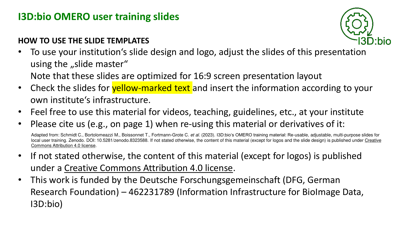

Slide Text: I3D:bio OMERO user training slides
HOW TO USE THE SLIDE TEMPLATES
• To use your institution‘s slide design and logo, adjust the slides of this presentation
using the „slide master“
Note that these slides are optimized for 16:9 screen presentation layout
• Check the slides for yellow-marked text and insert the information according to your
own institute‘s infrastructure.
• Feel free to use this material for videos, teaching, guidelines, etc., at your institute
• Please cite us (e.g., on page 1) when re-using this material or derivatives of it:
Adaptedfrom: Schmidt C., Bortolomeazzi M., Boissonnet T., Fortmann-Grote C. et al. (2023). I3D:bio‘s OMERO training material: Re-usable, adjustable, multi-purpose slides for
local user training. Zenodo.DOI: 10.5281/zenodo.8323588. Ifnot statedotherwise, thecontentof thismaterial (exceptforlogosand theslidedesign) ispublishedunderCreative
Commons Attribution 4.0 license.
• If not stated otherwise, the content of this material (except fo

In [5]:
# Function to display an image-text pair
def display_image_text_pair(slide_dict, pdf_name, slide_number):
    # Construct the image key based on the PDF name and slide number
    image_path = f"{pdf_name}_slide{slide_number}.png"
    
    # Check if the image path exists in the dictionary
    if image_path in slide_dict:
        # Open and display the image
        img = Image.open(image_path)
        display(img)
        
        # Display the corresponding text
        text = slide_dict[image_path]
        print("Slide Text:", text)
    else:
        print(f"Slide {slide_number} for PDF '{pdf_name}' not found in the dictionary.")

# Replace 'WhatIsOMERO' and 1 with the desired PDF name and slide number
display_image_text_pair(slide_dict, "WhatIsOMERO", 1)

# Comparing different Models
The code below uses some helper functions to prompt the models. The whole functions can be found at [endpoints.py](https://github.com/NFDI4BIOIMAGE/SlideInsight/blob/main/endpoints.py).

## 1. [OpenAi GPT-4o](https://github.com/marketplace/models/azure-openai/gpt-4o)

In [7]:
prompt = "Give me a short and precise summary (1-3 whole sentences) of what is displayed or explained in this Slide."

for i in range(1,(len(slides)+1)):
    result = prompt_chatgpt(f"slide{i}.png", prompt)
    print(f"Slide {i} Summary:\n", result, "\n")

Slide 1 Summary:
 The slide provides instructions for customizing and using training slides related to OMERO, highlighting aspects like design adjustments, screen optimization, and the inclusion of specific institutional content. It also specifies checking for and replacing yellow-marked text and mentions the licensing terms under which the material can be used or shared. 

Slide 2 Summary:
 The slide contains a disclaimer stating that the following slides are intended for reuse after substituting yellow-marked text with relevant information. It notes that the content may not apply to every OMERO installation and represents the authors' opinions, not speaking for the original software or its community. 

Slide 3 Summary:
 The slide introduces the use of the OMERO platform for managing bioimage data, specifically within the context of research data management for a bioimage data project. It includes placeholders for the institute's name and the author or responsible person. 

Slide 4 Su

## 2. [Llama-3.2-11B-Vision-Instruct](https://github.com/marketplace/models/azureml-meta/Llama-3-2-11B-Vision-Instruct)

In [11]:
for i in range(1,(len(slides)+1)):
    result = prompt_llama_11b(f"slide{i}.png", prompt)
    print(f"Slide {i} Summary:\n", result, "\n")

Slide 1 Summary:
 The image shows a slide with a simple white background that offers guidelines on how to use slide templates. The slide is titled "HOW TO USE THE SLIDE TEMPLATES" and provides instructions on how to adjust the slides, check the slides for yellow-marked text, and cite the content when reusing it. The slide also includes a note stating that the content under a Creative Commons Attribution 4.0 license is published. 

Slide 2 Summary:
 The image displays a "Disclaimer" slide, which contains two bullet points. The first bullet point states that the slides are intended for reuse after substituting yellow-marked text with relevant information from your institute. The second bullet point notes that some content may not apply to the specific setup of the OMERO installation at your institute. 

Slide 3 Summary:
 The slide introduces the OMERO platform for research data management, specifically designed for image data analysis, and invites the user to add an author or responsible

## 3. [Phi-3.5-vision instruct (128k)](https://github.com/marketplace/models/azureml/Phi-3-5-vision-instruct)

In [12]:
for i in range(1,(len(slides)+1)):
    result = prompt_phi(f"slide{i}.png", prompt)
    print(f"Slide {i} Summary:\n", result, "\n")

Slide 1 Summary:
  The slide provides instructions for using slide templates, customizing them, and cites the source of the work, which is funded by the German Research Foundation and published under a Creative Commons Attribution 4.0 license. 

Slide 2 Summary:
  The slide serves as a disclaimer for the presentation, stating that the following slides are for reuse with specific instructions for replacing yellow-marked text with relevant information. It also includes a disclaimer of liability and acknowledges the funding source for the project. 

Slide 3 Summary:
  The slide is a template for a presentation on image data management for bioimage data at a specified institute, with a focus on the OMERO platform. It prompts the addition of the presenter's name, institute, and logo. 

Slide 4 Summary:
  The slide presents information about OMERO, an open-source software for managing image data, created by the Open Microscopy Environment Consortium. It outlines the components involved, such

## 4. [Llama-3.2-90B-Vision-Instruct](https://github.com/marketplace/models/azureml-meta/Llama-3-2-90B-Vision-Instruct)

In [13]:
for i in range(1,(len(slides)+1)):
    result = prompt_llama_90b(f"slide{i}.png", prompt)
    print(f"Slide {i} Summary:\n", result, "\n")

Slide 1 Summary:
 This slide, titled "i3D:bio OMERO user training slides," provides instructions on how to use slide templates for the i3D:bio OMERO user training. The slide explains the design and logo adjustments, screen presentation layout, and information insertion according to the institute's infrastructure. Additionally, it mentions the Creative Commons Attribution 4.0 license and funding by the Deutsche Forschungsgemeinschaft (DFG, German Research Foundation). 

Slide 2 Summary:
 The slide displays a disclaimer regarding the reuse of slides, specifically highlighting that the yellow-marked text should be replaced with relevant information from the institute. Additionally, it notes that some content may not apply to the specific setup of the OMERO installation at the institute. The disclaimer also clarifies that the content reflects solely the authors' opinions and does not speak on behalf of the original software, its developers, or other cited community resources. 

Slide 3 Sum

## 5. [GPT-4o mini](https://github.com/marketplace/models/azure-openai/gpt-4o-mini)

In [14]:
for i in range(1,(len(slides)+1)):
    result = prompt_gpt_mini(f"slide{i}.png", prompt)
    print(f"Slide {i} Summary:\n", result, "\n")

Slide 1 Summary:
 The slide provides guidelines for using a specific template for presentations, emphasizing that text marked in yellow should be replaced with relevant information according to institutional requirements. It also notes that the content is subject to a Creative Commons Attribution 4.0 license. Funding sources are acknowledged at the bottom of the slide. 

Slide 2 Summary:
 The slide provides a disclaimer indicating that the following content is meant for reuse after customizing the yellow-marked text to fit the specific context of the user's institute. It also states that the content represents the authors' opinions and does not officially represent the original software or other community resources. 

Slide 3 Summary:
 The slide introduces the OMERO platform for managing bioimage data, emphasizing its role in research data management. It also suggests adding relevant information about authors or responsible persons from the institution and encourages personalization wi